# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2023/2024

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają na celu wyłapać podstawowe błędy. Przejście przez kod wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem). Rozmiar poziomy figur nie powinien przekraczać 20 cali.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

Nazwa zespołu: IAD13
Członkowie: Zuzanna Brauer, Sandra Głowacka, Zuzanna Chmielarska

---

## Zestaw zadań 2: Elementy statystyki opisowej 2 (Notatnik 3/3)

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

### Wczytanie danych
Poniższy kod wczytuje do zmiennej `recession_data_1` dane z przygotowanego wcześniej pliku recession_data_1.pkl oraz dane z pliku recession_table_1.pkl do zmiennej `recession_table_1`.

W celu wczytania danych umieść plik w tym samym folderze, w którym znajduje się notatnik.

In [3]:
recession_data_1 = pd.read_pickle("recession_data_1.pkl")
recession_data_1

,Country Name,Region Name,Income Group,2006,2007,2008,2009,2010,2011
Country Code,,,,,,,,,
AFG,Afghanistan,Asia,Low,5.357403,13.826320,3.924984,21.390528,14.362441,0.426355
ALB,Albania,Europe,Lower middle,5.902659,5.983260,7.500041,3.354289,3.706938,2.545406
DZA,Algeria,Africa,Upper middle,1.700000,3.400000,2.400000,1.600000,3.600000,2.900000
ASM,American Samoa,Oceania,Upper middle,-4.098361,1.851852,-2.657343,-4.166667,0.299850,0.000000
AND,Andorra,Europe,High,4.808689,1.553188,-5.559186,-5.302847,-1.974958,-0.008070
...,...,...,...,...,...,...,...,...,...
VIR,Virgin Islands (U.S.),Americas,High,3.504993,4.010594,1.218625,-6.594789,0.596383,-8.204246
PSE,West Bank and Gaza,Asia,Lower middle,-0.996556,3.788282,7.429182,8.593491,5.777362,9.600808
YEM,"Yemen, Rep.",Asia,Low,3.170409,3.338428,3.647569,3.866230,7.702307,-12.714897


In [4]:
recession_table_1 = pd.read_pickle("recession_table_1.pkl")
recession_table_1

Year,2006,2007,2008,2009,2010,2011
"(-20, -15]",0.0,0.0,1.0,2.0,0.0,0.0
"(-15, -10]",0.0,0.0,1.0,9.0,0.0,2.0
"(-10, -5]",1.0,2.0,5.0,26.0,5.0,6.0
"(-5, 0]",15.0,6.0,26.0,59.0,17.0,17.0
"(0, 5]",71.0,78.0,90.0,68.0,89.0,96.0
"(5, 10]",93.0,90.0,64.0,27.0,72.0,68.0
"(10, 15]",14.0,17.0,9.0,6.0,12.0,7.0
"(15, 20]",1.0,4.0,2.0,0.0,1.0,1.0
"(20, 25]",0.0,1.0,0.0,1.0,1.0,1.0
"(25, 30]",2.0,0.0,0.0,0.0,1.0,0.0


### Zadanie 4: Obliczanie wartości wybranych opisowych charakterystyk rozkładu w oparciu o szereg szczegółowy [5 pkt]

Korzystając z danych zawartych w tablicy `recession_data_1` oraz funkcji pakietu pandas oblicz dla każdego roku następujące opisowe charakterystyki rozkładu:
- wartość średnia (ang. mean),
- odchylenie standardowe (ang. standart deviation),
- wartość minimalna (ang. minimum),
- kwartyle (ang. quartiles),
- wartość maksymalna (ang. maximum),
- eksces/kurtoza (ang. excess kurtosis),
- skośność (ang. skew).

Zestaw wyniki w tablicy `descriptive_parameters_1`.

Indeks:
 - zawiera następujące nazwy wierszy: mean, std, min, Q1, Q2, Q3, max, kurt, skew.
 
Kolumny:
 - lata (osobna kolumna dla każdego roku opatrzona nagłówkiem 2006, 2007 itd. sformatowanym jako str)

In [5]:
# YOUR CODE HERE
years = ['2006', '2007', '2008', '2009', '2010', '2011']
descriptive_parameters_1 = pd.DataFrame(columns = years)

descriptive_parameters_1.loc['mean'] = recession_data_1[years].mean()
descriptive_parameters_1.loc['std'] = recession_data_1[years].std()
descriptive_parameters_1.loc['min'] = recession_data_1[years].min()
descriptive_parameters_1.loc['Q1'] = recession_data_1[years].quantile(.25)
descriptive_parameters_1.loc['Q2'] = recession_data_1[years].quantile(.5)
descriptive_parameters_1.loc['Q3'] = recession_data_1[years].quantile(.75)
descriptive_parameters_1.loc['max'] = recession_data_1[years].max()
descriptive_parameters_1.loc['kurt'] = recession_data_1[years].kurt()
descriptive_parameters_1.loc['skew'] = recession_data_1[years].skew()

descriptive_parameters_1

,2006,2007,2008,2009,2010,2011
mean,5.678241,5.676541,3.658874,-0.099351,4.285734,3.812680
std,4.659570,4.128360,4.494198,5.812413,4.503445,4.354840
min,-6.871463,-6.684028,-17.668946,-17.573222,-8.924176,-12.714897
Q1,3.455779,3.204031,1.004863,-3.739051,1.719445,1.636183
Q2,5.404226,5.622465,3.807492,0.129142,4.132582,3.821286
Q3,7.560790,7.700604,6.240954,3.499009,6.705470,6.316869
max,34.500000,25.000000,17.799109,21.390528,25.122760,21.616529
kurt,10.163041,2.877701,3.166838,0.931665,3.435235,3.107475
skew,1.870104,0.723625,-0.597186,-0.150527,0.649393,-0.107946


In [6]:
### Komórka testowa
# Testy wybranych wartości z tablicy
assert np.isclose(descriptive_parameters_1.loc["mean", "2006"], 5.678241)
assert np.isclose(descriptive_parameters_1.loc["std", "2007"], 4.128360)
assert np.isclose(descriptive_parameters_1.loc["min", "2008"], -17.668946)
assert np.isclose(descriptive_parameters_1.loc["Q1", "2009"], -3.739051)
assert np.isclose(descriptive_parameters_1.loc["Q2", "2010"], 4.132582)
assert np.isclose(descriptive_parameters_1.loc["Q3", "2011"], 6.316869)
assert np.isclose(descriptive_parameters_1.loc["max", "2006"], 34.5)
assert np.isclose(descriptive_parameters_1.loc["kurt", "2007"], 2.877701)
assert np.isclose(descriptive_parameters_1.loc["skew", "2008"], -0.597186)

### Zadanie 5: Praca z szeregami rozdzielczymi (25 pkt)
Na potrzeby realizacji tego zadania załóżmy, że nie były dostępne dane szczegółowe, a jedynie tablica szeregu rozdzielczego przedziałowego. Ma to istotny wpływ na proces dokonywania obliczeń i wizualizacji wyników. Wykonaj poniższe zadanie bazując wyłącznie na danych z tablicy `recession_table_1`.

Uwaga! Zadanie nie zawiera pełnej analizy danych, i ma wyłącznie charakter demonstracji pokazującej jak można prowadzić analizę, gdy nie są dostępne dane szczegółowe.

#### a) Obliczanie wartości wybranych opisowych charakterystyk rozkładu

Korzystając z danych zawartych w tablicy `recession_table_1` oblicz dla każdego roku następujące opisowe charakterystyki rozkładu:
- wartość średnia (ang. mean),
- odchylenie standardowe (ang. standart deviation),
- kwartyle (ang. quartiles),
- moda (ang. mode).

Zestaw wyniki w tablicy `descriptive_parameters_2`.

> Indeks: </br>
> Zawiera wiersze o następujących nazwach: mean, std, Q1, Q2, Q3, mode.

> Kolumny: lata (osobna kolumna dla każdego roku opatrzona nagłówkiem 2006, 2007 itd. sformatowanym jako str) </br>

Uwaga! W celu otrzymania maksymalnej liczby punktów otrzymane wyniki powinny być w całości wynikiem pracy napisanego kodu, bez manualnego określania, w którym przedziale znajdują się określone statystyki itp.

In [7]:
# YOUR CODE HERE
ids = pd.interval_range(start = -20, end = 35, periods = 11)
years = ['2006', '2007', '2008', '2009', '2010', '2011']
descriptive_parameters_2 = pd.DataFrame(columns = years)

for year in years:
    sum_col_mean = 0
    for id in ids:
        sum_col_mean += id.mid * recession_table_1.loc[id, year]
    descriptive_parameters_2.loc['mean', year] = sum_col_mean/recession_table_1[year].sum()

for year in years:
    quadratic_diff_col_sum = 0
    for id in ids:
        quadratic_diff_col_sum += (id.mid - descriptive_parameters_2.loc['mean', year])**2*recession_table_1.loc[id, year]
    descriptive_parameters_2.loc['std', year] = (quadratic_diff_col_sum/recession_table_1[year].sum())**0.5

descriptive_parameters_2

for year in years:
    cum_sum = 0
    q_loc = recession_table_1[year].sum()/4
    for id in ids:
        cum_sum += recession_table_1.loc[id, year]
        if cum_sum >= q_loc:
            descriptive_parameters_2.loc['Q1', year] = id.right + (q_loc - cum_sum)/recession_table_1.loc[id, year]*id.length
            break

for year in years:
    cum_sum = 0
    q_loc = recession_table_1[year].sum()/2
    for id in ids:
        cum_sum += recession_table_1.loc[id, year]
        if cum_sum >= q_loc:
            descriptive_parameters_2.loc['Q2', year] = id.right + (q_loc - cum_sum)/recession_table_1.loc[id, year]*id.length
            break

for year in years:
    cum_sum = 0
    q_loc = 3*recession_table_1[year].sum()/4
    for id in ids:
        cum_sum += recession_table_1.loc[id, year]
        if cum_sum >= q_loc:
            descriptive_parameters_2.loc['Q3', year] = id.right + (q_loc - cum_sum)/recession_table_1.loc[id, year]*id.length
            break

for year in years:
    id_of_max = recession_table_1[year].idxmax()
    descriptive_parameters_2.loc['mode', year] = id_of_max.left + (recession_table_1.loc[id_of_max, year] - recession_table_1.loc[id_of_max - id_of_max.length, year])/((recession_table_1.loc[id_of_max, year] - recession_table_1.loc[id_of_max - id_of_max.length, year]) + (recession_table_1.loc[id_of_max, year] - recession_table_1.loc[id_of_max + id_of_max.length, year]))*id_of_max.length

descriptive_parameters_2

,2006,2007,2008,2009,2010,2011
mean,5.606061,5.782828,3.636364,-0.10101,4.545455,3.863636
std,4.853809,4.184001,4.751033,6.045066,4.685347,4.568125
Q1,2.359155,2.660256,0.916667,-3.940678,1.544944,1.276042
Q2,5.645161,5.722222,3.666667,0.220588,4.325843,3.854167
Q3,8.306452,8.472222,6.992188,3.860294,7.604167,7.022059
mode,6.089109,5.705882,3.555556,0.9,4.044944,3.691589


In [8]:
### Komórka testowa
# Testy wybranych wartości z tablicy
assert np.isclose(descriptive_parameters_2.loc["mean", "2006"], 5.606061)
assert np.isclose(descriptive_parameters_2.loc["std", "2007"], 4.184001)
assert np.isclose(descriptive_parameters_2.loc["Q1", "2008"], 0.916667)
assert np.isclose(descriptive_parameters_2.loc["Q2", "2009"], 0.220588)
assert np.isclose(descriptive_parameters_2.loc["Q3", "2010"], 7.604167)
assert np.isclose(descriptive_parameters_2.loc["mode", "2011"], 3.691589)

#### b) Wizualizacja
Zwizualizuj dane z tablic `recession_table_1` oraz `descriptive_parameters_2` za pomocą:
 - histogramu zliczeń (lewa oś wykresu) z nałożonym na niego łamaną częstości skumulowanej (prawa oś wykresu) wykonanych dla jednego, wybranego przez siebie roku,
 - diagramów częstości wyliczonych dla poszczególnych lat i skonstruowanych w obarciu o całość danych,
 - wykresów pudełkowych wyliczonych dla poszczególnych lat i skonstruowanych w obarciu o całość danych.
 
Zestaw wykresy na pojedynczej figurze (siatka wykresów 2x2, przy czym wykres pudełkowy zajmuje oba pola w dolnym wierszu figury). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Postaraj się, w miarę istniejących możliwości, aby formatowanie wykresów było jak najbardziej zbliżone do formatowania wykresów przygotowanych w poprzednim notatniku, dodatkowo:

dla histogramu i łamanej częstości skumulowanej:
- ustaw różne od domyślnych i od siebie nawzajem kolory wykresu słupkowego oraz łamanej częstości,
- ustaw kolory lewej i prawej osi oraz ich opisów identyczne z kolorem elementu wykresu, którego dotyczą,
- jako etykiety danych na osi x ustaw przedziały danych z tablicy `recession_table_1`,

dla diagramów częstości:
- ustaw kolory identyczne z tymi przypisanymi poszczególnym latom w zadaniu 3a,
- dodaj do wykresu legendę zawierającą nazwę wizualizowanego parametru oraz kolory przypisane poszczególnym latom w taki sposób, aby nie zasłaniała/zasłaniały znajdujących się na wykresach danych,
- jako etykiety danych na osi x ustaw przedziały danych z tablicy `recession_table_1`,

dla wykresu pudełkowego:
- ustaw kolor linii pudełka identyczny z kolorem ich wypełnienia w zadaniu 3b,
- ustaw kolor linii wąsów identyczny z ich kolorem w zadaniu 3b.

Wykresy pudełkowe powinny zawierać oznaczenia wartości średniej oraz mediany.

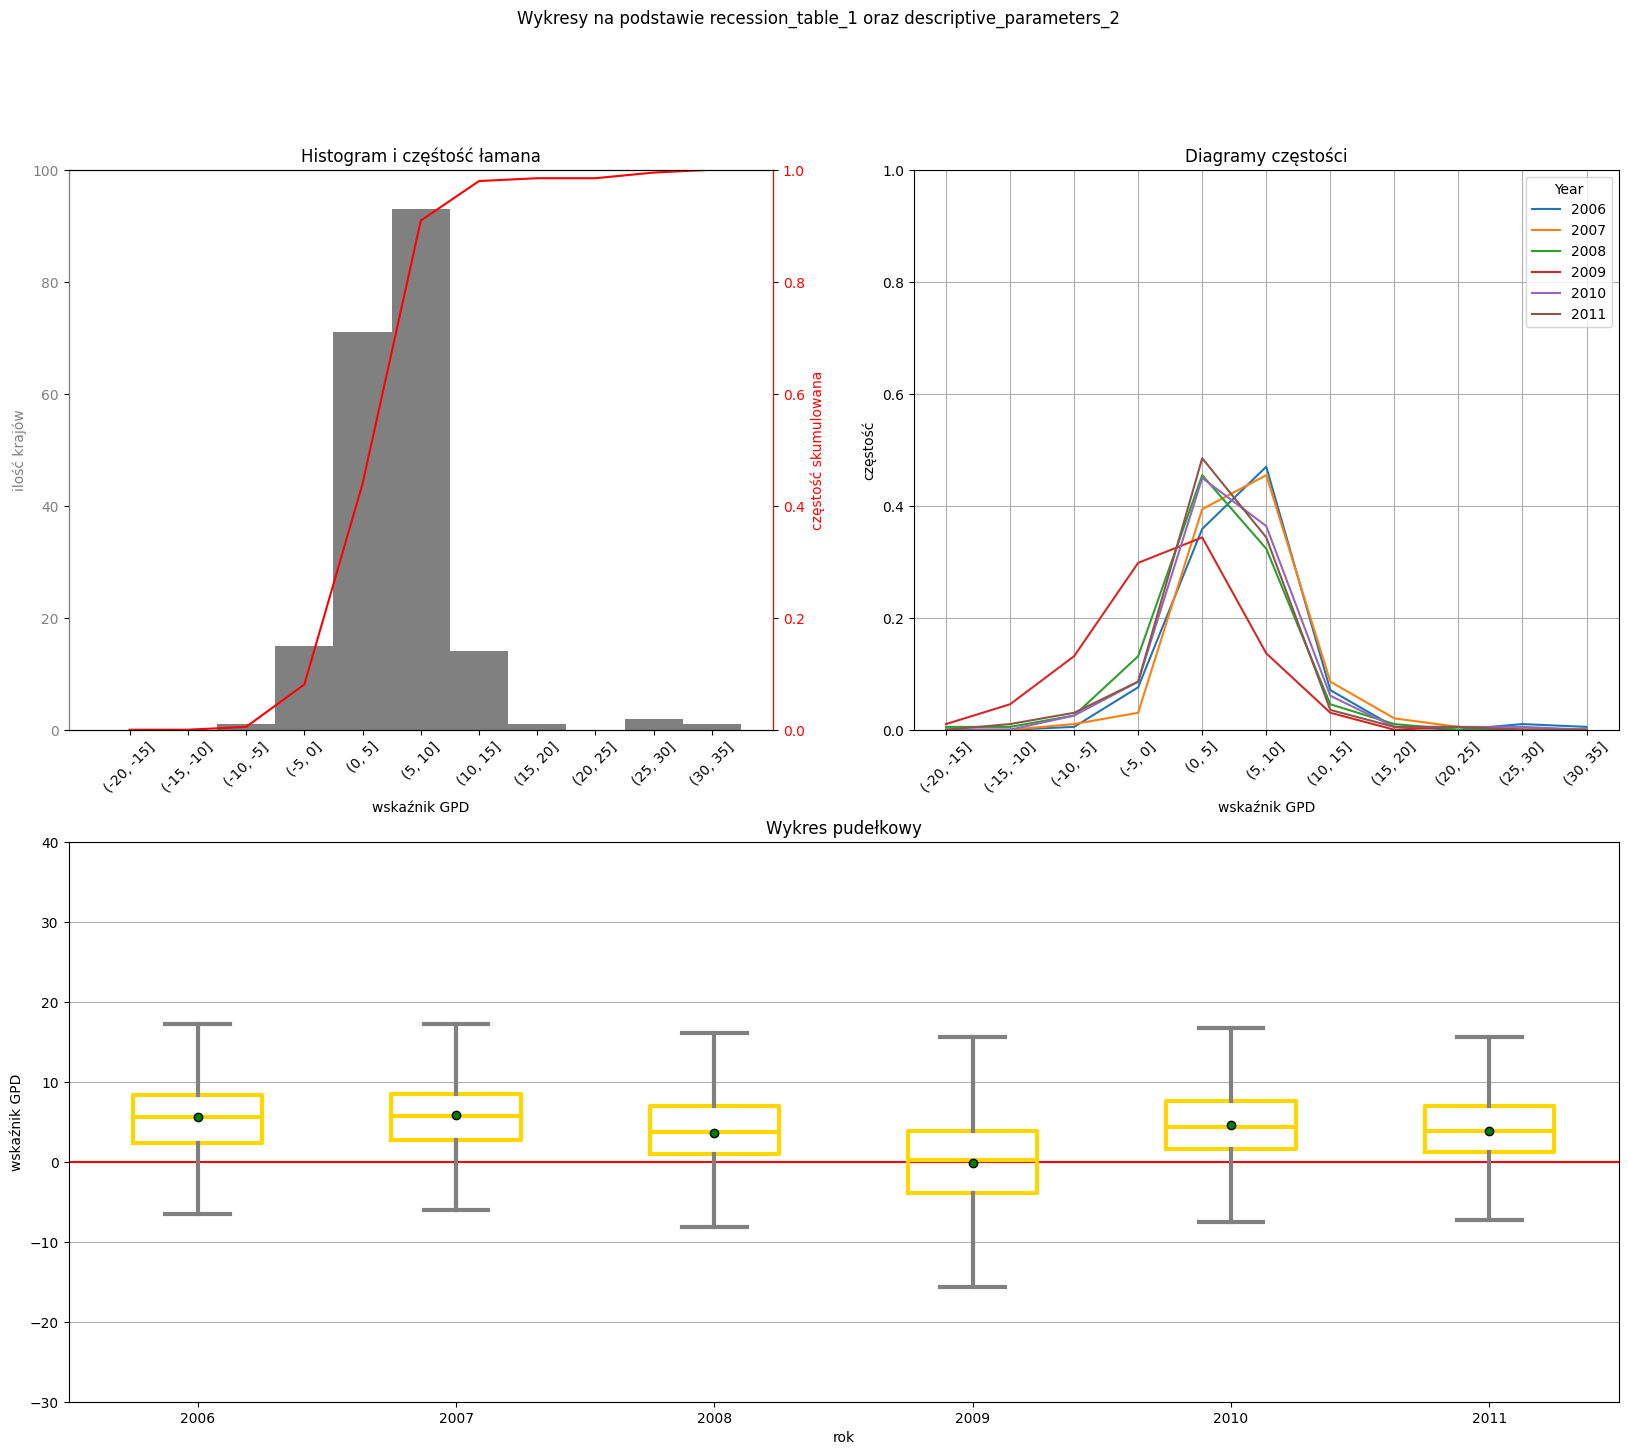

In [10]:
# YOUR CODE HERE
fig, ax = plt.subplot_mosaic(
    """
    AB
    CC
    """, figsize = (20,16)
)
xlabels = [str(x) for x in recession_table_1.index.values]
fig.suptitle('Wykresy na podstawie recession_table_1 oraz descriptive_parameters_2')

twinx = ax['A'].twinx()
ax['A'].bar(xlabels, recession_table_1['2006'], color='gray', width = 1)
twinx.plot(xlabels, recession_table_1['2006'].cumsum()/recession_table_1['2006'].sum(), color='red')
ax['A'].set_ylim([0,100])
twinx.set_ylim([0,1])
ax['A'].set_xlabel('wskaźnik GPD')
ax['A'].set_ylabel('ilość krajów', color = 'gray')
ax['A'].set_title('Histogram i częśtość łamana')
ax['A'].tick_params(axis = 'y', labelcolor = 'gray')
twinx.set_ylabel('częstość skumulowana', color = 'red')
twinx.tick_params(axis = 'y', labelcolor = 'red')
twinx.spines['left'].set_color('grey')
twinx.spines['right'].set_color('red')
ax['A'].tick_params(axis='x', labelrotation = 45)

ax['B'].set_title('Diagramy częstości')
ax['B'].plot(xlabels, recession_table_1/recession_table_1.sum())
ax['B'].set_ylim([0,1])
ax['B'].grid(True)
ax['B'].legend(['2006','2007','2008','2009','2010','2011'], title = 'Year')
ax['B'].set_xlabel('wskaźnik GPD')
ax['B'].set_ylabel('częstość')
ax['B'].tick_params(axis='x', labelrotation = 45)

data = []
for year in descriptive_parameters_2.columns:
    year_data = descriptive_parameters_2[year]
    whislo = year_data["Q1"] - 1.5*(year_data["Q3"] - year_data["Q1"])
    whishi = year_data["Q3"] + 1.5*(year_data["Q3"] - year_data["Q1"])
    data.append({"med":year_data["Q2"], "q1":year_data["Q1"], "q3":year_data["Q3"], "whislo":whislo, "whishi":whishi, 'mean':year_data["mean"]})

ax['C'].axhline(y=0, color='red')
ax['C'].set_ylim([-30,40])
ax['C'].yaxis.grid(True)
ax['C'].set_xlabel('rok')
ax['C'].set_ylabel('wskaźnik GPD')
ax['C'].set_title('Wykres pudełkowy')
ax['C'].bxp(bxpstats = data, showfliers = False, showmeans = True, positions = [* range(2006,2012)],
           meanprops = {'marker':'o', 'markerfacecolor':'green', 'markeredgecolor': 'black'},
           whiskerprops = {'color':'gray', 'linewidth':3},
           capprops = {'color':'gray', 'linewidth':3},
           medianprops = {'color':'gold', 'linewidth':3},
            boxprops = {'color':'gold', 'linewidth':3});